In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score,accuracy_score,confusion_matrix,recall_score


In [3]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
X = df.iloc[:,0:30]
y = df.iloc[:, 30]
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 4)

In [6]:
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test  = std.fit_transform(X_test)

# KNN

In [7]:
kn = KNeighborsClassifier(n_neighbors=9,metric='euclidean')
kn.fit(X_train,y_train)
y_pred = kn.predict(X_test)

In [8]:
# Metrics
print("accuracy_score:",accuracy_score(y_test,y_pred))
print("precision_score:",precision_score(y_test,y_pred))
print("recall_score:",recall_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)


accuracy_score: 0.9736842105263158
precision_score: 0.9873417721518988
recall_score: 0.975


array([[33,  1],
       [ 2, 78]])

# Decision Tree

In [9]:
dt = DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=5,max_leaf_nodes=5)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

In [10]:
print("accuracy_score:",accuracy_score(y_test,y_pred))
print("precision_score:",precision_score(y_test,y_pred))
print("recall_score:",recall_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

accuracy_score: 0.9035087719298246
precision_score: 0.948051948051948
recall_score: 0.9125


array([[30,  4],
       [ 7, 73]])

# Naive Bayes

In [11]:
nvb = GaussianNB()
nvb.fit(X_train,y_train)
y_pred = nvb.predict(X_test)

In [12]:
print("accuracy_score:",accuracy_score(y_test,y_pred))
print("precision_score:",precision_score(y_test,y_pred))
print("recall_score:",recall_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

accuracy_score: 0.9210526315789473
precision_score: 0.9733333333333334
recall_score: 0.9125


array([[32,  2],
       [ 7, 73]])

In [13]:
results = {
    "Model": ["Logistic Regression","Decision Tree" ,"Naive Bayes"],
    "Accuracy": [0.9736842105263158, 0.9210526315789473, 0.9210526315789473],
    "Precision": [0.9873417721518988, 0.9863013698630136, 0.9733333333333334],
    "Recall" : [0.975,0.9,0.9125]
}

df_results = pd.DataFrame(results)
df_results

,Model,Accuracy,Precision,Recall
0,Logistic Regression,0.973684,0.987342,0.9750
1,Decision Tree,0.921053,0.986301,0.9000
2,Naive Bayes,0.921053,0.973333,0.9125


[Text(0.625, 0.875, 'x[23] <= -0.02\nentropy = 0.966\nsamples = 455\nvalue = [178, 277]'),
 Text(0.5, 0.625, 'x[27] <= 0.326\nentropy = 0.454\nsamples = 304\nvalue = [29, 275]'),
 Text(0.5625, 0.75, 'True  '),
 Text(0.25, 0.375, 'x[1] <= 0.499\nentropy = 0.155\nsamples = 268\nvalue = [6, 262]'),
 Text(0.125, 0.125, 'entropy = 0.041\nsamples = 226\nvalue = [1, 225]'),
 Text(0.375, 0.125, 'entropy = 0.527\nsamples = 42\nvalue = [5, 37]'),
 Text(0.75, 0.375, 'x[1] <= 0.253\nentropy = 0.944\nsamples = 36\nvalue = [23, 13]'),
 Text(0.625, 0.125, 'entropy = 0.934\nsamples = 20\nvalue = [7, 13]'),
 Text(0.875, 0.125, 'entropy = 0.0\nsamples = 16\nvalue = [16, 0]'),
 Text(0.75, 0.625, 'entropy = 0.102\nsamples = 151\nvalue = [149, 2]'),
 Text(0.6875, 0.75, '  False')]

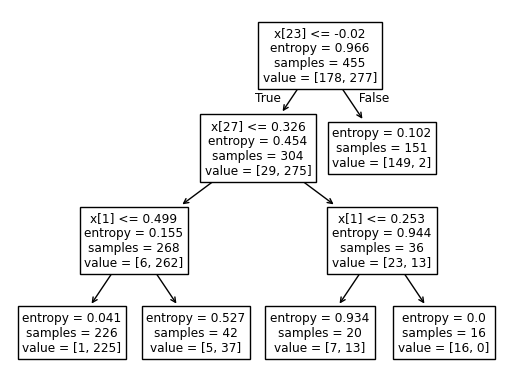

In [14]:
from sklearn.tree import plot_tree
plot_tree(dt)